In [4]:
!pip install scikit-learn

In [6]:
import sklearn
print("scikit-learn version: ", sklearn.__version__)

scikit-learn version:  1.6.1


In [8]:
#SVM

#import important libraries

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [16]:
available_datasets = [attr for attr in dir(datasets) if not attr.startswith("__")]
print(available_datasets)
synthetic_dataset = []
toy_dataset = []
realworld_dataset = []
unknown_dataset=[]
for dataset in available_datasets:
    match dataset:
        case _ if dataset.startswith("fetch"):
            print("Real-world dataset: ",dataset)
            realworld_dataset.append(dataset)
        case _ if dataset.startswith("load"):
            print("Toy dataset: ",dataset)
            toy_dataset.append(dataset)
        case _ if dataset.startswith("make"):
            print("Synthetic dataset: ",dataset)
            synthetic_dataset.append(dataset)
        case _:
            print("Unknown dataset: ", dataset)
            unknown_dataset.append(dataset)

def print_datasets_Details(title, datasetlist):
    print("\ntitle {}".format(title))
    for i , dataset in enumerate(datasetlist,1):
        print(f"\tdataset {i} = {dataset}")
    print()

print_datasets_Details("RealworldDataset",realworld_dataset)
print_datasets_Details("syntheticdataset",synthetic_dataset)
print_datasets_Details("toydataset",toy_dataset)
print_datasets_Details("unknowndataset",unknown_dataset)

['_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel

In [20]:
!pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [133]:
iris = datasets.load_iris() # load as numpy array
x=iris.data
y=iris.target
iris.data[:3] # slicing

import pandas as pd
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [134]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [135]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [136]:
print(iris_df.shape[0])
print(iris_df.count())

def shape_attr():
    data = {'A':[1,2,3,4,5],
            'B':[4,6,8,9,4]
           }
    df=pd.DataFrame(data)
    print("\n.shape return tuple representing dim of Dataframe(row, column)\n")
    print("Number of rows: ", df.shape[0])
    print("Number of columns: ", df.shape[1])

    print("\nnumber of rows using len() \n")
    print("Number of rows: ", len(df))
shape_attr()

150
sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

.shape return tuple representing dim of Dataframe(row, column)

Number of rows:  5
Number of columns:  2

number of rows using len() 

Number of rows:  5


In [137]:
# empty_rows_count = iris_df.isnull().sum(axis=1).gt(0).sum()
# gt - compare values with specific values
# axis = 1 = rows wise

missing_per_rows = iris_df.isnull().sum(axis=1)
print(missing_per_rows)
Total_missing_rows = missing_per_rows.gt(0).sum()
print("\nTotal rows with atleast one missing: ", Total_missing_rows)
print("Total non empty rows: ", missing_per_rows.eq(0).sum())
print()

not_missing_per_rows = iris_df.notnull().sum(axis=1)
print(not_missing_per_rows)


0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

Total rows with atleast one missing:  0
Total non empty rows:  150

0      4
1      4
2      4
3      4
4      4
      ..
145    4
146    4
147    4
148    4
149    4
Length: 150, dtype: int64


In [138]:
iris_df.dropna()
len(iris_df)


for column in iris_df.select_dtypes(include=['object']).columns:
    print("Categorical column: ", column)
    iris_df[column] = iris_df[column].fillna(iris_df[column].mode()[0])
for column in iris_df.select_dtypes(exclude=['object']).columns:
    print("Numerical column: ",column)
    types=iris_df[column].dtypes
    print(types)
    # if types =='int64' or types=='float64':
    if types in ['int64','float64']:
        print(f"{column} datatypes: {types}")
        # iris_df[column].fillna(iris_df[column].mean(),inplace=True)
        iris_df[column] = iris_df[column].fillna(iris_df[column].mean()) #avoid warning due to inplace

Numerical column:  sepal length (cm)
float64
sepal length (cm) datatypes: float64
Numerical column:  sepal width (cm)
float64
sepal width (cm) datatypes: float64
Numerical column:  petal length (cm)
float64
petal length (cm) datatypes: float64
Numerical column:  petal width (cm)
float64
petal width (cm) datatypes: float64


In [139]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [140]:
#convert categorical column to numerical
iris_df = pd.get_dummies(iris_df) #one hot encoding with get_dummies - binary coding

def onehotencoding():
    data = {'name': ['kuhan', 'thayu', 'kishore', 'bala'],
            'color':['black','blue','white','grey'],
            'id':[1,2,3,4]
           }
    df = pd.DataFrame(data)
    # print(df.head(3))
    # return df.head(3)
    # df = pd.get_dummies(df)
    # df = pd.get_dummies(df, columns=['name'])
    df = pd.get_dummies(df, columns=['name','color'])
    return df
    
# onehotencoding()


In [141]:
type(x)
print(x[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [142]:
y[:3]

array([0, 0, 0])

In [143]:
rawdata= datasets.load_iris() 
rawdata
rawdata_df=pd.DataFrame(data=rawdata.data, columns = rawdata.feature_names)
rawdata_df

rawdata_df['target']=rawdata.target
rawdata_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [144]:
rawdata_df['targetDes']=rawdata_df['target'].map(lambda x: rawdata.target_names[x])
rawdata_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,targetDes
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [146]:
for a in range(len(rawdata.target_names)):
    print("at index: ",a, "values is: ",rawdata.target_names[a])

at index:  0 values is:  setosa
at index:  1 values is:  versicolor
at index:  2 values is:  virginica


In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
svm_model = SVC(kernel ='linear', C=1.0, random_state=42)
svm_model.fit(x_train, y_train)
dist_mat = svm_model.decision_function(x_test)
print("Distance to the dicision boundary:\n")
dist_mat # signed distance of sample from the decision boundary for a particular class
# C=1.0 : trade-off between mis-classification error and maximizing the margin between classes.
    #regularization parameter.
    # high C = overfitting
    # low C = more Error in classification but wider margin
    # C = 1.0 default value

Distance to the dicision boundary:



array([[-0.26019436,  2.26209932,  0.96378743],
       [ 2.23724986,  1.29745266, -0.30498687],
       [-0.29631833,  1.16105677,  2.29203057],
       [-0.25758634,  2.25968593,  0.96284288],
       [-0.265303  ,  2.26343657,  1.03856659],
       [ 2.23637623,  1.29596285, -0.30398452],
       [-0.21598921,  2.27215544,  0.75905541],
       [-0.27623461,  1.24149118,  2.22944026],
       [-0.26531959,  2.25360365,  1.13955482],
       [-0.2346599 ,  2.26985192,  0.78270015],
       [-0.2729476 ,  1.24589203,  2.21024067],
       [ 2.23997819,  1.29521845, -0.30387673],
       [ 2.24920443,  1.29823971, -0.30658229],
       [ 2.23757821,  1.29533225, -0.30371103],
       [ 2.24582651,  1.29679529, -0.30539758],
       [-0.25959512,  2.26170117,  0.96089506],
       [-0.28495758,  1.21045412,  2.2689561 ],
       [-0.23620759,  2.26814875,  0.79096561],
       [-0.25587932,  2.25950944,  0.94178012],
       [-0.28370647,  1.21089933,  2.26658974],
       [ 2.23328901,  1.29406972, -0.302

In [153]:
y_predict = svm_model.predict(x_test)
accuracy= accuracy_score(y_test, y_predict)
accuracy


1.0

In [156]:
classification_rept = classification_report(y_test, y_predict)
print(classification_rept)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [162]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------  7.9/8.0 MB 60.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 19.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 15.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 17.0 MB/s eta 0:00:00


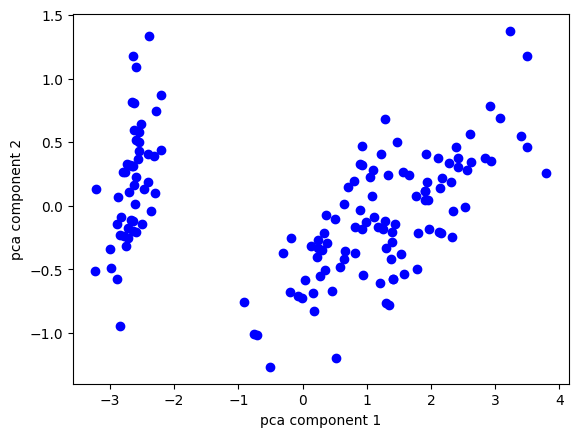

In [165]:
#graph

#reduce data to 2 dim

from sklearn.decomposition import PCA

pca =PCA(n_components =2)
x_reduced = pca.fit_transform(x)

# print(x_reduced)

import matplotlib.pyplot as plt

plt.scatter(x_reduced[:,0],x_reduced[:,1], c='blue', marker='o')
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.show()


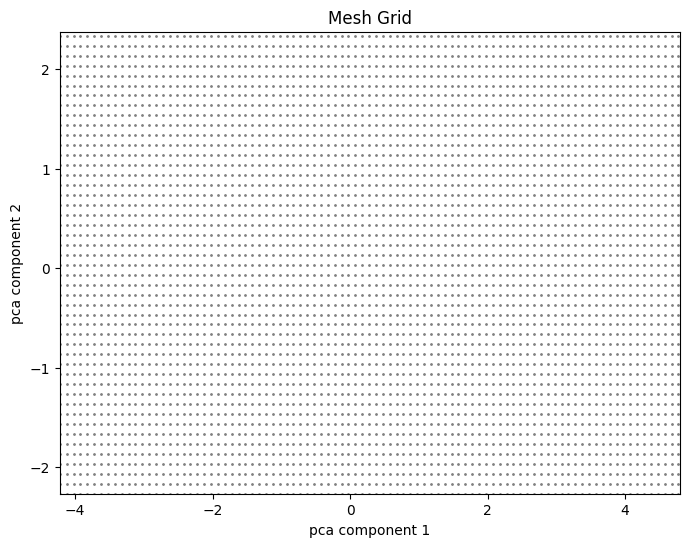

In [197]:
#meshgrid creation
import numpy as np
step_sizeofmesh = .10
xmin, xmax = x_reduced[:,0].min()-1, x_reduced[:,0].max()+1
ymin, ymax = x_reduced[:,1].min()-1, x_reduced[:,1].max()+1
xx,yy = np.meshgrid(np.arange(xmin,xmax,step_sizeofmesh), np.arange(ymin, ymax,step_sizeofmesh))

plt.figure(figsize=(8,6))
plt.scatter(xx,yy,color='grey',s=1) # s=size
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.title('Mesh Grid')
plt.show()


In [219]:
svm_model_2d = SVC(kernel = 'linear', C=0.1, random_state=42)
xtrain, xtest,ytrain, ytest = train_test_split(x_reduced, y, test_size=0.3, random_state=42)

svm_model_2d.fit(xtrain,ytrain)
z= svm_model_2d.predict(np.c_[xx.ravel(),yy.ravel()]) # ravel = for 1D flattened array
# np.c_[x,y] - combine 1D into 2D array

z=z.reshape(xx.shape) # make z (1d) into 2D array


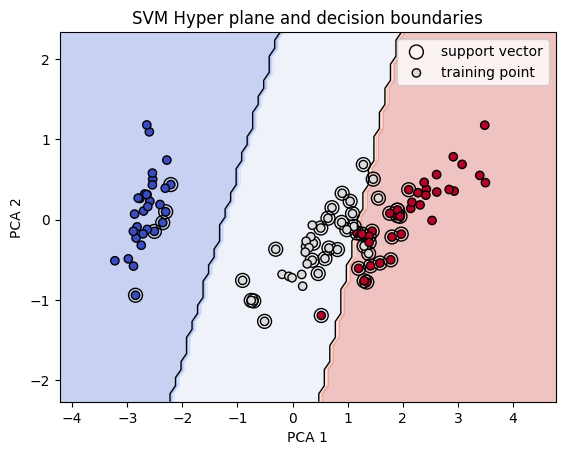

In [220]:
#plot

plt.contourf(xx,yy,z, alpha=0.3, cmap=plt.cm.coolwarm) #fille contour plot
# alpha = transparency = 30% opaque
#
plt.contour(xx,yy,z,levels=[-1,0,1], linewidths=1, colors='black')
# level[0] = draw only decision boundary of SVM plot - where decision function z=0
plt.scatter(svm_model_2d.support_vectors_[:,0], svm_model_2d.support_vectors_[:,1],s=100, facecolor='none', edgecolors='k', marker='o', label="support vector")
plt.scatter(xtrain[:,0], xtrain[:,1], c=ytrain, edgecolors='k', cmap=plt.cm.coolwarm, marker='o', label="training point")
# c= color based on class c

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("SVM Hyper plane and decision boundaries")
plt.legend()
plt.show()